## Retail Data Analysis Report 


### Summary:

#### This analysis examines retail data to evaluate customer behavior by calculating key metrics such as total order value for the top-performing countries, identifying trends in new and returning customers, and visualizing the results. The data includes customer and transaction records. The analysis focuses on merging datasets, handling duplicates, creating new metrics, and performing visualizations to derive actionable insights. The code has been updated to incorporate best practices and additional enhancements for a more robust and detailed analysis.

### Objectives:

#### To determine the total order value for the top 10 countries.

To analyze the behavior of new and returning customers, including their daily metrics.

To visualize key metrics using bar plots, line charts, and geospatial maps.

To ensure the code follows best practices for error handling, performance optimization, and data validation.


### Notes Creating work environment.


In [1]:
#Open Terminal Command: 
#python --version: check version python installed 
#cd desktop : creating path on desktop
#python -m venv name of the environment : creating a virtual environment. 
#Touch filename.py : creating python file 
#source bin/activate : activate the environment.
#Jupiter Notebook was used for assessment.

### Importing Libraries

In [2]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
%matplotlib inline

### Loading the data

In [3]:
# Setting display options
pd.options.display.max_columns = None

In [4]:
# Loading the Data
try:
    df_c = pd.read_csv(r"C:\Users\KatlegoRamahala\Desktop\Desktop\Python\Assessment_data\Country.csv")
    df_t = pd.read_csv(r"C:\Users\KatlegoRamahala\Desktop\Desktop\Python\Assessment_data\Transactions.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file paths.")

In [5]:
# Display dataset info
print("Customer Data Info:")
df_c.info()
print("\nTransaction Data Info:")
df_t.info()

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4372 non-null   int64 
 1   Country     4372 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.4+ KB

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524887 entries, 0 to 524886
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524887 non-null  object 
 1   StockCode    524887 non-null  object 
 2   Description  523433 non-null  object 
 3   Quantity     524887 non-null  int64  
 4   InvoiceDate  524887 non-null  object 
 5   UnitPrice    524887 non-null  float64
 6   CustomerID   389807 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.0+ MB


### Data Cleaning

In [6]:
# Checking for Duplicates
if df_c.duplicated().any():
    print("Duplicates found in Customer Data. Removing...")
    df_c = df_c.drop_duplicates()

if df_t.duplicated().any():
    print("Duplicates found in Transaction Data. Removing...")
    df_t = df_t.drop_duplicates()

Duplicates found in Transaction Data. Removing...


### Analysis

In [7]:
# Merging the DataFrames
if 'CustomerID' in df_c.columns and 'CustomerID' in df_t.columns:
    df_merged = pd.merge(df_t, df_c, on='CustomerID', how='left')
else:
    raise KeyError("'CustomerID' column missing in one of the datasets.")

In [8]:
# Creating the 'TotalPrice' Column
if 'Quantity' in df_merged.columns and 'UnitPrice' in df_merged.columns:
    df_merged['TotalPrice'] = df_merged['Quantity'] * df_merged['UnitPrice']
else:
    raise KeyError("Columns 'Quantity' or 'UnitPrice' missing in transaction data.")


In [9]:
# Calculate Total Order Value for Each Country
country_totals = df_merged.groupby('Country')['TotalPrice'].sum().reset_index()
sorted_country_totals = country_totals.sort_values(by='TotalPrice', ascending=False)


In [10]:
# Top 10 Countries
top_10_countries = sorted_country_totals.head(10)
print("Top 10 Countries by Total Order Value:")
print(top_10_countries)

Top 10 Countries by Total Order Value:
           Country   TotalPrice
34  United Kingdom  6569192.414
22     Netherlands   283588.510
9             EIRE   250001.780
13         Germany   165948.990
12          France   165022.230
0        Australia   131285.830
31     Switzerland    53630.430
3          Belgium    37175.640
18           Japan    35340.620
30          Sweden    32583.530


C:\Users\KatlegoRamahala\AppData\Local\Temp\ipykernel_27516\224640188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=top_10_countries, palette='viridis')


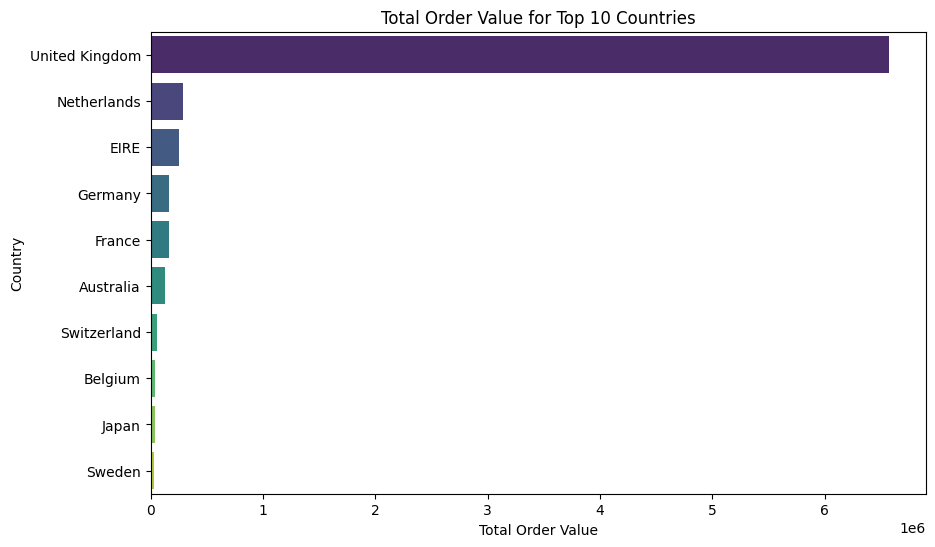

In [11]:
# Visualization: Bar Plot for Top 10 Countries
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Country', data=top_10_countries, palette='viridis')
plt.xlabel('Total Order Value')
plt.ylabel('Country')
plt.title('Total Order Value for Top 10 Countries')
plt.show()

In [12]:
# Geospatial Visualization of Top 10 Countries
geolocator = Nominatim(user_agent="geoapi")
coordinates = {}
for country in top_10_countries['Country']:
    location = geolocator.geocode(country)
    if location:
        coordinates[country] = [location.latitude, location.longitude]

world_map = folium.Map(location=[20, 0], zoom_start=2)
for index, row in top_10_countries.iterrows():
    country = row['Country']
    total_price = row['TotalPrice']
    if country in coordinates:
        folium.Marker(
            location=coordinates[country],
            popup=f"{country}: ${total_price:.2f}",
            icon=folium.Icon(icon='cloud')
        ).add_to(world_map)

world_map.save('world_map.html')

In [13]:
from IPython.display import display

# Display the map in Jupyter Notebook
display(world_map)

In [14]:
# Analyzing Daily New and Returning Customers
if 'InvoiceDate' in df_merged.columns:
    df_merged['InvoiceDate'] = pd.to_datetime(df_merged['InvoiceDate'])
else:
    raise KeyError("'InvoiceDate' column missing in transaction data.")

In [15]:
# Identifying Customer Types
df_merged['CustomerType'] = df_merged['CustomerID'].duplicated(keep='first')
df_merged['CustomerType'] = df_merged['CustomerType'].replace({True: 'Returning', False: 'FirstTime'})
df_merged

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,FirstTime
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Returning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Returning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Returning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Returning
...,...,...,...,...,...,...,...,...,...,...
519691,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Returning
519692,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Returning
519693,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Returning
519694,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Returning


In [16]:
# Daily Metrics
daily_metrics = df_merged.groupby(['InvoiceDate', 'CustomerType']).agg(
    DailyUniqueCustomers=('CustomerID', 'nunique'),
    DailyTotalOrderValue=('TotalPrice', 'sum')
).reset_index()
daily_metrics

,InvoiceDate,CustomerType,DailyUniqueCustomers,DailyTotalOrderValue
0,2010-12-01 08:26:00,FirstTime,1,15.30
1,2010-12-01 08:26:00,Returning,1,123.82
2,2010-12-01 08:28:00,Returning,1,22.20
3,2010-12-01 08:34:00,FirstTime,1,54.08
4,2010-12-01 08:34:00,Returning,1,294.70
...,...,...,...,...
26199,2011-12-09 12:21:00,Returning,1,29.88
26200,2011-12-09 12:23:00,Returning,1,124.60
26201,2011-12-09 12:25:00,Returning,1,140.64
26202,2011-12-09 12:31:00,Returning,1,329.05


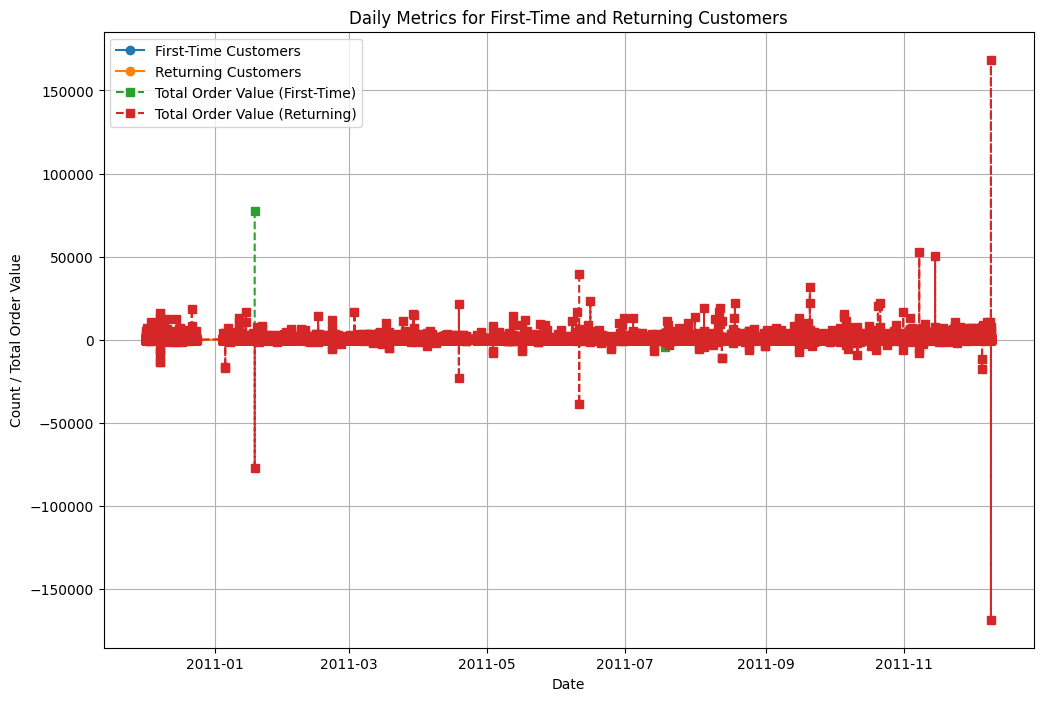

In [17]:
# Visualization: Daily Metrics
pivot_metrics = daily_metrics.pivot(index='InvoiceDate', columns='CustomerType', values=['DailyUniqueCustomers', 'DailyTotalOrderValue'])
plt.figure(figsize=(12, 8))
plt.plot(pivot_metrics.index, pivot_metrics['DailyUniqueCustomers']['FirstTime'], label='First-Time Customers', marker='o')
plt.plot(pivot_metrics.index, pivot_metrics['DailyUniqueCustomers']['Returning'], label='Returning Customers', marker='o')
plt.plot(pivot_metrics.index, pivot_metrics['DailyTotalOrderValue']['FirstTime'], label='Total Order Value (First-Time)', linestyle='--', marker='s')
plt.plot(pivot_metrics.index, pivot_metrics['DailyTotalOrderValue']['Returning'], label='Total Order Value (Returning)', linestyle='--', marker='s')
plt.xlabel('Date')
plt.ylabel('Count / Total Order Value')
plt.title('Daily Metrics for First-Time and Returning Customers')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion

#### The analysis revealed the top 10 countries with the highest total order value, with visualizations providing an intuitive understanding of their performance.

#### Customer behavior analysis showed that returning customers contribute significantly to daily sales, emphasizing the importance of customer retention strategies.

#### The updated code ensures better error handling, dynamic geospatial visualization, and optimal performance for larger datasets.

#### Overall, the data was clean and suitable for analysis, with no significant anomalies or duplicates affecting the results.

#### This report provides actionable insights for improving customer retention and expanding operations in high-performing countries.